# **Libraries**

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **Data Handling And Cleansing**

In [113]:
data = pd.read_csv('/content/Real estate.csv')
data

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...,...
409,410,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5


In [114]:
print(data.shape)
print("***DATA INFORMATIONS***")
print(data.info())

(414, 8)
***DATA INFORMATIONS***
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB
None


In [115]:
DATA= data.drop(['No','X1 transaction date'], axis = 1)
DATA.rename(columns={'X2 house age': 'X1 house age',
                          'X3 distance to the nearest MRT station': 'X2 nearst subway',
                          'X4 number of convenience stores':'X3 number of stores',
                          'X5 latitude':'X4 latitude',
                          'X6 longitude':'X5 longitude'},
                          inplace=True)
DATA

,X1 house age,X2 nearst subway,X3 number of stores,X4 latitude,X5 longitude,Y house price of unit area
0,32.0,84.87882,10,24.98298,121.54024,37.9
1,19.5,306.59470,9,24.98034,121.53951,42.2
2,13.3,561.98450,5,24.98746,121.54391,47.3
3,13.3,561.98450,5,24.98746,121.54391,54.8
4,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...
409,13.7,4082.01500,0,24.94155,121.50381,15.4
410,5.6,90.45606,9,24.97433,121.54310,50.0
411,18.8,390.96960,7,24.97923,121.53986,40.6
412,8.1,104.81010,5,24.96674,121.54067,52.5


In [116]:
DATA.describe()

,X1 house age,X2 nearst subway,X3 number of stores,X4 latitude,X5 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


# **Exploratory Data Analysis**

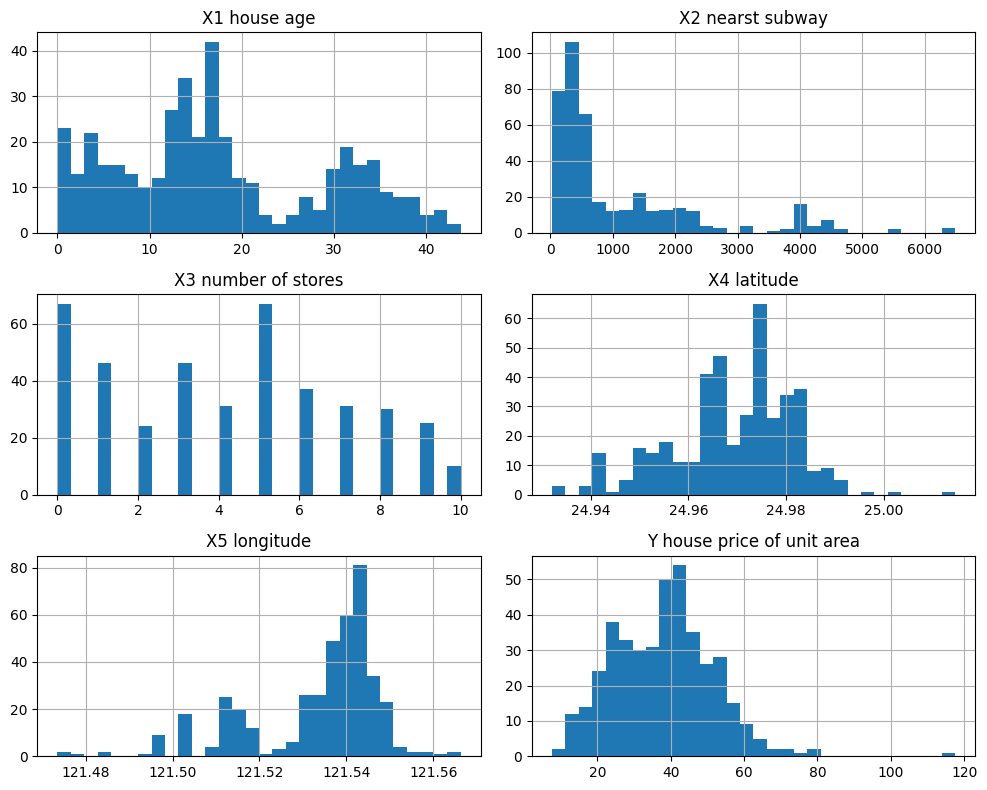

In [117]:
DATA.hist(bins=30, figsize=(10, 8))
plt.tight_layout()
plt.show()

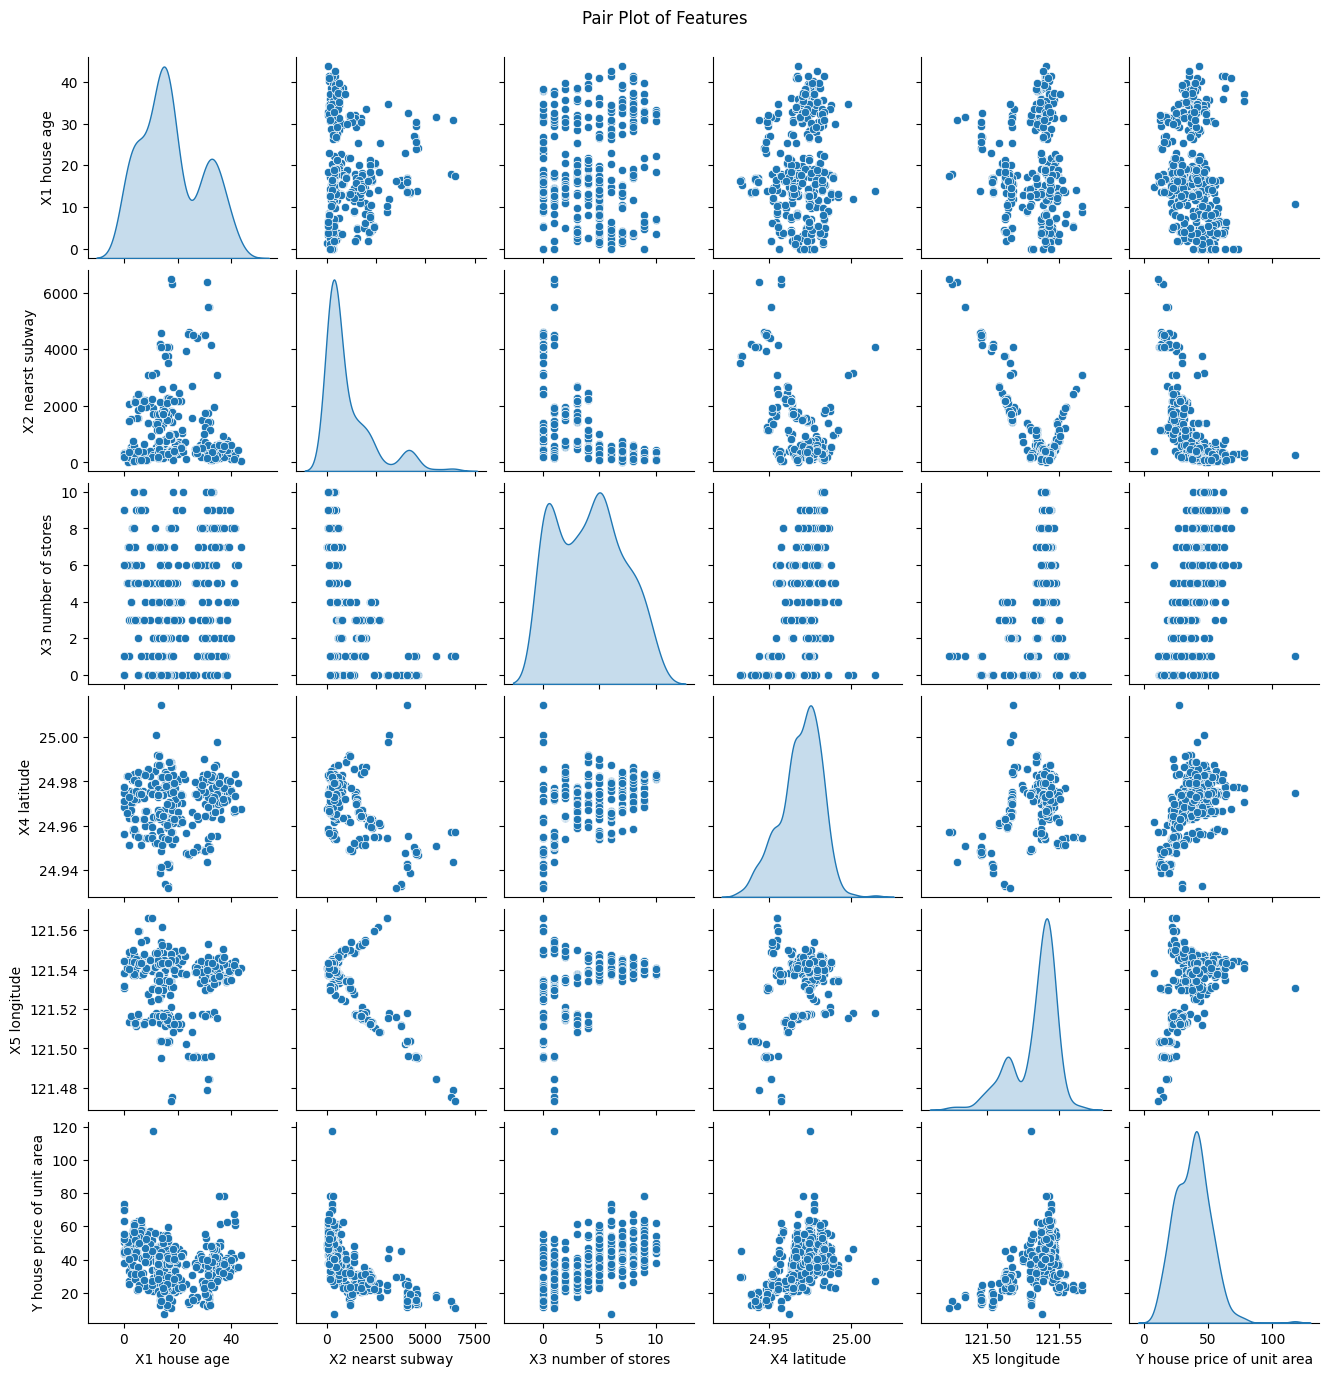

In [118]:
sns.pairplot(DATA, diag_kind="kde",height=2.25)
plt.suptitle("Pair Plot of Features", y=1.02)
plt.show()

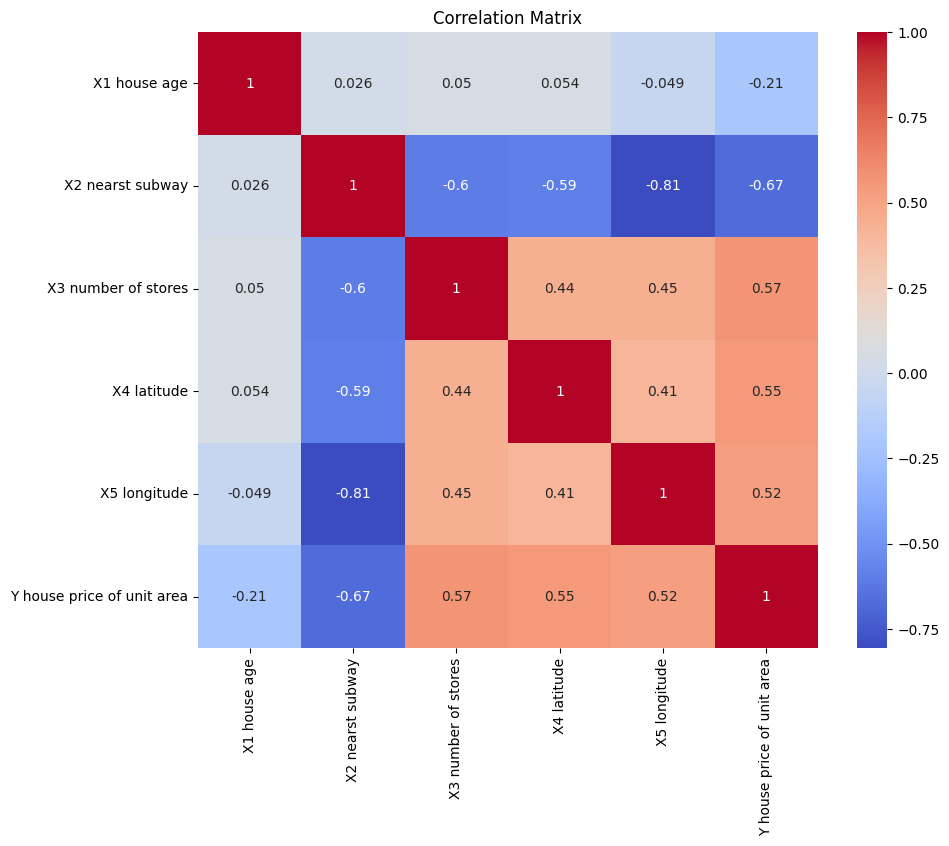

In [119]:
plt.figure(figsize=(10, 8))
sns.heatmap(DATA.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

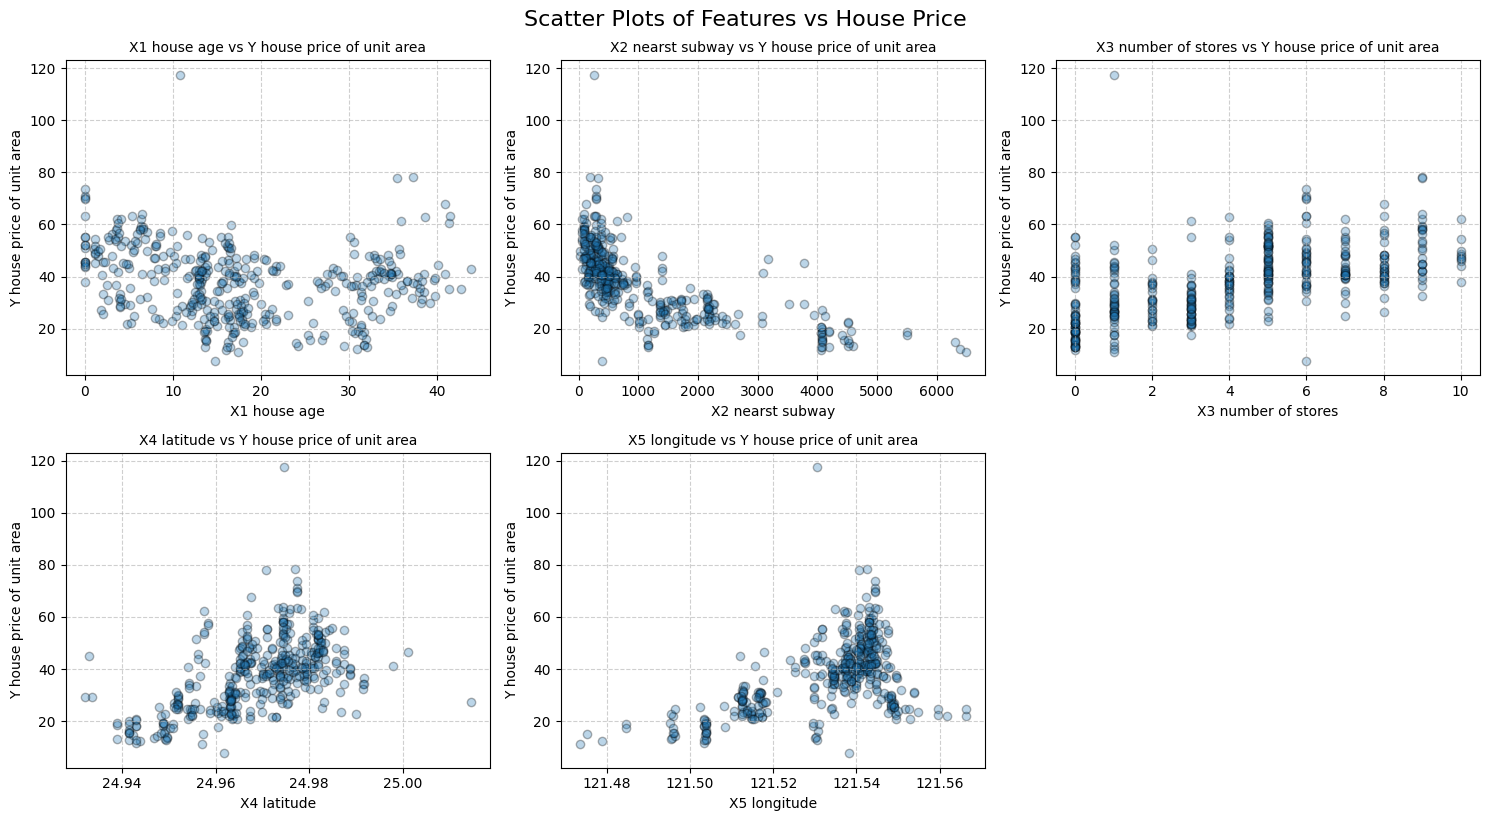

In [120]:
features = DATA.drop(['Y house price of unit area'], axis = 1)
target = 'Y house price of unit area'
plt.figure(figsize=(15, 8))
for i, feature in enumerate(features, 1):
    plt.subplot(2, 3, i)  # Arrange subplots in a 2x3 grid
    plt.scatter(DATA[feature], DATA[target], alpha=0.3, edgecolor='k')
    plt.title(f"{feature} vs {target}", fontsize=10)
    plt.xlabel(feature, fontsize=10)
    plt.ylabel(target, fontsize=10)
    plt.grid(True, linestyle='--', alpha=0.6)

# Adjust layout and display
plt.tight_layout()
plt.suptitle("Scatter Plots of Features vs House Price", fontsize=16, y=1.02)
plt.show()

In [121]:
from sklearn.model_selection import train_test_split
x=DATA.drop(['Y house price of unit area'], axis= 1)
y=DATA['Y house price of unit area']
x_test, x_train, y_test, y_train = train_test_split(x, y, test_size=0.2, random_state=42)

# **Linear Regression Model**

In [122]:
from sklearn.linear_model import LinearRegression
linearModel = LinearRegression()
linearModel.fit(x_train, y_train)

LinearRegression()

In [123]:
linearModel.coef_

array([-2.61884985e-01, -3.19943801e-03,  1.35792438e+00,  2.48486152e+02,
        5.53015314e+01])

In [124]:
predictions =  linearModel.predict(x_test)
predictions

array([38.20595654, 33.25618946, 32.9483167 , 40.96327945, 44.80866877,
       31.9682422 , 38.35287651, 14.62303738, 40.16509105, 44.54116094,
       47.00167366, 45.82626347, 39.83920044, 31.61823347, 43.92977648,
       30.01658184, 45.51115204, 29.2181124 , 35.74428142, 41.79036279,
       31.66171149, 45.90860828, 52.65109415, 30.64895294, 27.75083302,
       40.21746805, 36.02945632, 33.93864099, 38.78604769, 47.1991268 ,
       46.20764103, 26.01311142, 40.15942097, 45.74150555, 46.27641543,
       30.43247625, 30.72624567, 44.4377642 , 13.78951681, 50.25049539,
       47.18787188, 39.29770082, 45.56478734, 14.28065253, 49.46604979,
       14.87972831, 31.17905952, 32.34297174, 40.21951504, 47.51706595,
       41.55311185, 33.8503187 , 34.15598583, 38.54597452, 30.72109075,
       32.2872424 , 25.62609476, 37.28696316, 42.77434006, 54.72796601,
       39.16824552, 45.63675155, 43.13835571, 44.98106253, 42.0903515 ,
       45.81496948, 30.25535177, 42.127658  , 30.68208765, 41.42

Text(0, 0.5, 'Predicted Values')

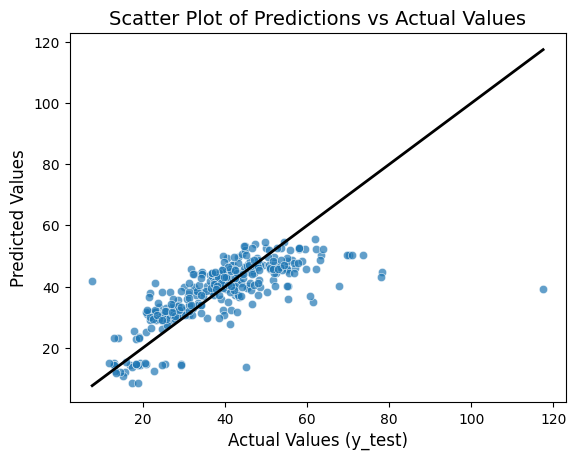

In [125]:
sns.scatterplot(x=y_test, y=predictions, alpha=0.7)

plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k-', lw=2)

plt.title("Scatter Plot of Predictions vs Actual Values", fontsize=14)
plt.xlabel("Actual Values (y_test)", fontsize=12)
plt.ylabel("Predicted Values", fontsize=12)

In [126]:
from sklearn.metrics import root_mean_squared_error, r2_score
print("RMSE:",root_mean_squared_error(y_test, predictions))
print('R2:', r2_score(y_test,predictions))

RMSE: 9.29229383802998
R2: 0.5409299053218448


# **Randome Forest Regression Model**

In [127]:
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor()
reg.fit(x_train, y_train)

RandomForestRegressor()

In [128]:
predictions =  reg.predict(x_test)
predictions

array([49.75466667, 27.532     , 28.283     , 36.026     , 48.4655    ,
       29.825     , 40.023     , 17.85633333, 40.26      , 32.081     ,
       42.932     , 45.544     , 40.32      , 28.239     , 44.243     ,
       24.073     , 49.5623    , 24.881     , 38.562     , 39.06025   ,
       25.356     , 52.4297    , 56.083     , 28.10333333, 24.035     ,
       40.468     , 35.805     , 37.166     , 36.32233333, 49.0365    ,
       49.0755    , 24.47066667, 47.56253333, 49.1894    , 48.08766667,
       24.515     , 28.00633333, 42.32866667, 17.90533333, 54.59096667,
       47.29656667, 42.041     , 45.6346    , 18.12633333, 50.61425   ,
       20.02633333, 27.928     , 29.08      , 42.288     , 47.61846667,
       38.62      , 29.966     , 38.729     , 44.09546667, 41.198     ,
       38.289     , 25.089     , 38.833     , 46.276     , 50.253     ,
       39.072     , 49.2604    , 47.158     , 41.152     , 48.62125   ,
       46.144     , 27.545     , 49.31411667, 27.807     , 40.51

Text(0, 0.5, 'Predicted Values')

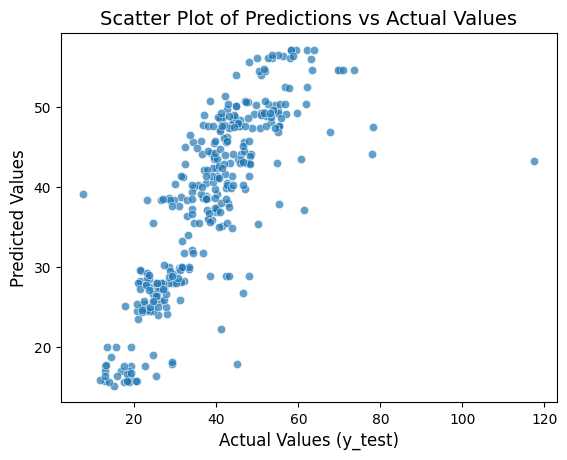

In [129]:
sns.scatterplot(x=y_test, y=predictions, alpha=0.7)

#plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k-', lw=2)

plt.title("Scatter Plot of Predictions vs Actual Values", fontsize=14)
plt.xlabel("Actual Values (y_test)", fontsize=12)
plt.ylabel("Predicted Values", fontsize=12)

In [130]:
print("RMSE:",root_mean_squared_error(y_test, predictions))
print('R2:', r2_score(y_test,predictions))

RMSE: 8.148458272292217
R2: 0.6469924246734765


# **Ridge Regression Model**

In [131]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge

In [132]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [133]:
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(x_train_scaled, y_train)

Ridge()

In [134]:
predictions = ridge_model.predict(x_test_scaled)
predictions

array([38.20278058, 33.19286429, 32.88234576, 41.00665585, 44.83270582,
       31.91331557, 38.30509746, 14.74782602, 40.16444428, 44.56185109,
       47.01881012, 45.79199273, 39.85541196, 31.56439708, 43.93185181,
       29.98461845, 45.5169179 , 29.19492604, 35.83372191, 41.7193359 ,
       31.80634062, 45.74989874, 52.54102551, 30.86161123, 27.73828345,
       40.21621618, 35.96442452, 33.96761508, 38.68361458, 47.19236372,
       46.20527494, 26.45725876, 40.04034973, 45.73107753, 46.25145874,
       30.58696318, 30.85877501, 44.43086365, 13.91289874, 50.18576451,
       47.07824133, 39.3885016 , 45.54715147, 14.39692431, 49.33395443,
       14.96992609, 31.13197716, 32.29226948, 40.20500422, 47.4995723 ,
       41.53801106, 33.77422346, 34.21552765, 38.65180411, 30.91789062,
       32.39798393, 25.63723189, 37.31431006, 42.78360221, 54.61115846,
       39.19199398, 45.62753374, 43.13105448, 44.9563567 , 41.9781952 ,
       45.79617546, 30.22205492, 42.03013171, 30.63909879, 41.36

Text(0, 0.5, 'Predicted Values')

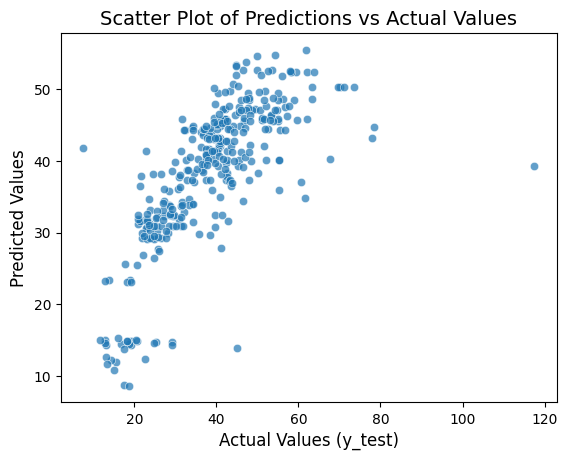

In [135]:
sns.scatterplot(x=y_test, y=predictions, alpha=0.7)

#plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k-', lw=2)

plt.title("Scatter Plot of Predictions vs Actual Values", fontsize=14)
plt.xlabel("Actual Values (y_test)", fontsize=12)
plt.ylabel("Predicted Values", fontsize=12)

In [136]:
print("RMSE:",root_mean_squared_error(y_test, predictions))
print('R2:', r2_score(y_test,predictions))

RMSE: 9.297564589556972
R2: 0.5404089724548877


# Lasso Regression Model

In [111]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [137]:
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(x_train_scaled, y_train)

Lasso(alpha=0.1)

In [139]:
predictions = lasso_model.predict(x_test_scaled)
predictions

array([38.40584066, 33.23731645, 32.92631958, 40.99625235, 44.55838966,
       32.02630583, 38.38749382, 14.91682893, 40.16383772, 44.25679116,
       46.71946984, 45.684859  , 39.92370235, 31.65581091, 43.90458689,
       30.11184986, 45.22553104, 29.31252699, 35.83922597, 41.7521986 ,
       31.6852764 , 45.79660625, 52.3385288 , 30.53682392, 27.85488713,
       40.21413202, 36.03642421, 34.07590744, 38.79808062, 46.92314018,
       45.94601391, 25.80628776, 40.07104125, 45.55147622, 46.19409078,
       30.49463772, 30.73737214, 44.27964558, 14.08506303, 49.90055444,
       46.96963762, 39.14755293, 45.41530113, 14.56105306, 49.22377402,
       15.07132937, 31.25281221, 32.43791887, 40.31438564, 47.2033713 ,
       41.4248496 , 33.79643016, 34.30752197, 38.45460644, 30.84198784,
       32.3234182 , 25.80696284, 37.35840008, 42.73809382, 54.34635194,
       39.17680062, 45.45088763, 43.15612954, 44.89464294, 42.03330646,
       45.76386137, 30.3418579 , 42.04363994, 30.75700508, 41.35

In [140]:
print("RMSE:",root_mean_squared_error(y_test, predictions))
print('R2:', r2_score(y_test,predictions))

RMSE: 9.290931872164858
R2: 0.5410644667098476
